In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col=0, parse_dates=True)
df.sample(5)

,value
date,
2019-10-29,211967
2017-07-18,78235
2019-05-13,90475
2018-12-26,76754
2019-10-26,118564


In [3]:
# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df.sample(5)

,value
date,
2019-02-21,114251
2018-06-27,69363
2018-05-21,57575
2017-03-22,34204
2017-05-11,46743


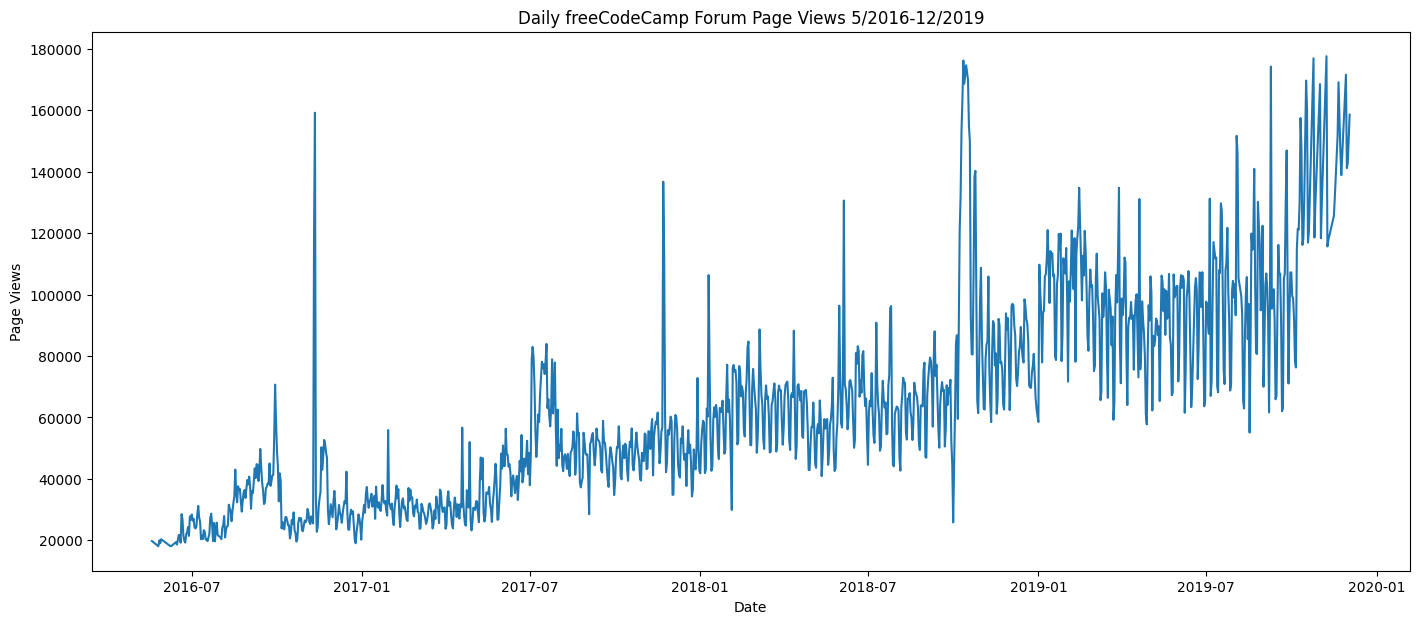

In [4]:
# Draw a line chart
fig = plt.figure(figsize=(17,7))
plt.plot(df['value'])
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.show()

In [5]:
# Draw a bar chart ------- FAIL --------- but was getting close ;)
#df.sample(5)
#x = df.groupby(by=[pd.DatetimeIndex(df.index).year, pd.DatetimeIndex(df.index).month])['value'].mean()
#x.index.set_names(names=['year', 'month'], inplace=True)
#x
#y = x.to_frame()
#y.index
#sns.barplot(x)
#z = x.unstack(level=0)
#z
#sns.barplot(z)

In [6]:
# https://stackoverflow.com/questions/68738800/how-to-create-a-yearly-bar-plot-grouped-by-months

In [7]:
from calendar import month_name
months = month_name[1:]
df_bar = df.copy()
df_bar['months'] = pd.Categorical(df_bar.index.strftime('%B'), categories=months, ordered=True)
df_bar.sample(5)

,value,months
date,,
2019-08-05,105386,August
2017-05-31,48219,May
2017-05-23,35395,May
2018-05-12,40878,May
2019-11-30,141161,November


In [8]:
dfp = pd.pivot_table(data=df_bar, index=pd.DatetimeIndex(df_bar.index).year, columns='months', values='value')
dfp.head()

months,January,February,March,April,May,June,July,August,September,October,November,December
date,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


In [9]:
#ax = dfp.plot(kind='bar', figsize=(12,4), ylabel='Mean Page Views', xlabel='Year', rot=0)
#_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

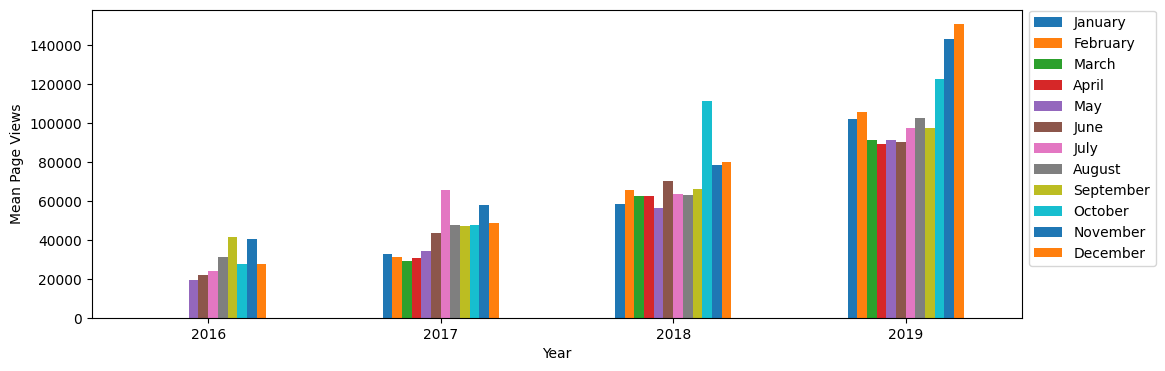

In [10]:
fig, ax = plt.subplots(figsize=(12,4))
bar_plot = dfp.plot(kind='bar', ylabel='Average Page Views', xlabel='Years', rot=0, ax=ax)
_ = bar_plot.legend(bbox_to_anchor=(1, 1.02), loc='upper left')


In [11]:
# draw a box plot
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.sample(5)

,date,value,year,month
975,2019-02-13,122283,2019,Feb
872,2018-11-02,73794,2018,Nov
363,2017-06-08,43983,2017,Jun
759,2018-07-09,62304,2018,Jul
151,2016-11-08,26744,2016,Nov


In [12]:
#sns.boxplot(data=df_box, x='year', y='value')

In [13]:
#sns.boxplot(data=df_box, x='month', y='value')

In [14]:
x = df_box['month'].unique()
print(x)
y = list(x[8:]) + list(x[:8])
print(y)

['May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec' 'Jan' 'Feb' 'Mar' 'Apr']
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Page Views')]

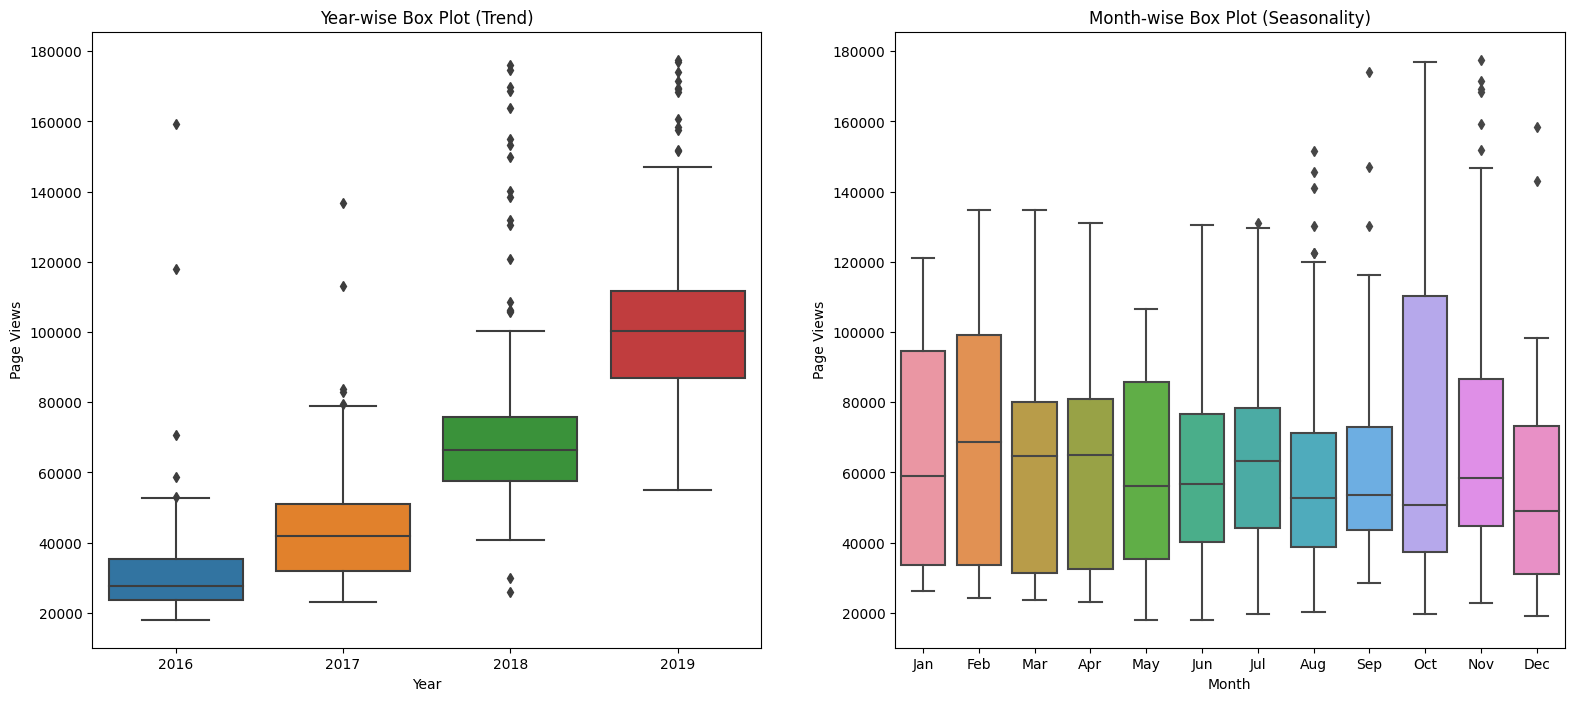

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(19,8))
ax1.set_title('Year-wise Box Plot (Trend)')
ax2.set_title('Month-wise Box Plot (Seasonality)')
sns.boxplot(data=df_box, x='year', y='value', ax=ax1)
sns.boxplot(data=df_box, x='month', y='value', ax=ax2, order=y)
ax1.set(xlabel='Year', ylabel='Page Views')
ax2.set(xlabel='Month', ylabel='Page Views')